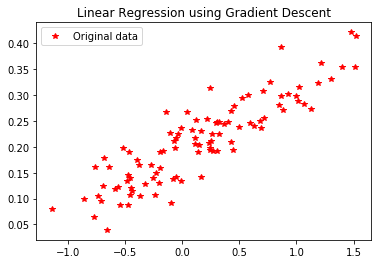

第 1 步的 损失=0.1077909842133522, 权重=[0.65288675], 偏差=[0.06716925]
第 2 步的 损失=0.04593818262219429, 权重=[0.46431124], 偏差=[0.11178643]
第 3 步的 损失=0.020034056156873703, 权重=[0.34226483], 偏差=[0.14061894]
第 4 步的 损失=0.009185336530208588, 权重=[0.2632829], 偏差=[0.15927939]
第 5 步的 损失=0.004641862120479345, 权重=[0.21216974], 偏差=[0.17135543]
第 6 步的 损失=0.002739042742177844, 权重=[0.17909187], 偏差=[0.17917044]
第 7 步的 损失=0.001942136907018721, 权重=[0.15768555], 偏差=[0.18422794]
第 8 步的 损失=0.001608390361070633, 权重=[0.14383245], 偏差=[0.18750088]
第 9 步的 损失=0.0014686164213344455, 权重=[0.13486741], 偏差=[0.18961897]
第 10 步的 损失=0.0014100787229835987, 权重=[0.12906569], 偏差=[0.1909897]
第 11 步的 损失=0.0013855628203600645, 权重=[0.12531112], 偏差=[0.19187675]
第 12 步的 损失=0.0013752958038821816, 权重=[0.12288135], 偏差=[0.19245082]
第 13 步的 损失=0.0013709956547245383, 权重=[0.12130892], 偏差=[0.19282232]
第 14 步的 损失=0.0013691947096958756, 权重=[0.12029132], 偏差=[0.19306274]
第 15 步的 损失=0.0013684406876564026, 权重=[0.11963278], 偏差=[0.19321832]
第 16 步的 损失=0.0013

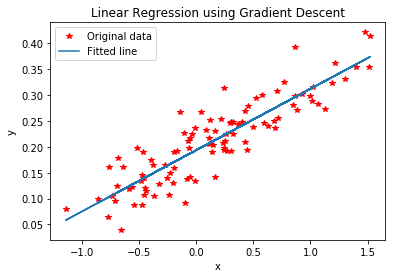

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

try:
    xrange = xrange  # Python 2
except:
    xrange = range   # Python 3

# 构建数据
points_num = 100
vectors = []

# 用 Numpy 的正态随机分布函数生成 100 个点
# 这些点的（x, y）坐标值对应线性方程 y = 0.1 * x + 0.2
# 权重（Weight）为 0.1，偏差（Bias）为 0.2
for i in xrange(points_num):
    x1 = np.random.normal(0.0, 0.66)
    y1 = 0.1 * x1 + 0.2 + np.random.normal(0.0, 0.04)
    vectors.append([x1, y1])

x_data = [v[0] for v in vectors]  # 真实的点的 x 坐标
y_data = [v[1] for v in vectors]  # 真实的点的 y 坐标

# 图像 1 ：展示 100 个随机数据点
plt.plot(x_data, y_data, 'r*', label="Original data")  # 红色星形的点
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()

# 构建线性回归模型
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))  # 初始化 Weight
b = tf.Variable(tf.zeros([1]))                      # 初始化 Bias
y = W * x_data + b                                  # 模型计算出来的 y

# 定义 loss function（损失函数）或 cost function（代价函数）
# 对 Tensor 的所有维度计算 ((y - y_data) ^ 2) 之和 / N
loss = tf.reduce_mean(tf.square(y - y_data))

# 用梯度下降的优化器来最小化我们的 loss（损失）
optimizer = tf.train.GradientDescentOptimizer(0.5)  # 设置学习率为 0.5
train = optimizer.minimize(loss)

# 创建会话
sess = tf.Session()

# 初始化数据流图中的所有变量
init = tf.global_variables_initializer()
sess.run(init)

# 训练 20 步
for step in xrange(20):
    # 优化每一步
    sess.run(train)
    # 打印出每一步的损失，权重和偏差
    print("第 {} 步的 损失={}, 权重={}, 偏差={}".format(step+1, sess.run(loss), sess.run(W), sess.run(b)))

# 图像 2 ：绘制所有的点并且绘制出最佳拟合的直线
plt.plot(x_data, y_data, 'r*', label="Original data")  # 红色星形的点
plt.title("Linear Regression using Gradient Descent")  # 标题，表示 "梯度下降解决线性回归"
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label="Fitted line")  # 拟合的线
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 关闭会话
sess.close()